In [85]:
# helper functions

def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))

In [86]:
import csv

ukrainian_default_freqs = []
path = './ukranian_default_freqs.csv'
f = open(path, 'r')
reader = csv.reader(f, skipinitialspace=True)
for row in reader:
    ukrainian_default_freqs.append( {
        "symbol": row[0].lower(),
        "frequency": float(row[1])
    })
# print(ukrainian_default_freqs)

In [87]:

compositions = []

path = './samples/compositions.csv'
f = open(path, 'r')
reader = csv.reader(f, skipinitialspace=True)
for row in reader:
    compositions.append( {
        "author": row[0],
        "composition": row[1],
        "file": row[2],
    })

def find_composition(file):
    a = next(filter(lambda a: a['file'] == file, compositions), None)
    return a

def find_composition_by_name(name):
    a = next(filter(lambda a: a['author'] == name, compositions), None)
    return a

def get_composition_title(a):
    return f"{a['author']} ({a['composition']})"

In [88]:
import os
import glob
path = './samples'
print('Files to read:')
files=[]
for filename in glob.glob(os.path.join(path, '*.txt')):
   with open(os.path.join(os.getcwd(), filename), 'r') as f:
       name = os.path.basename(f.name)
       a = find_composition(name)
       if a is None: continue
       print(name)
       files.append(f)

Files to read:
myrniy_lyxo-davnie-i-siogochasne.txt
panasenko_z-makondo-ye-zvyazok.txt
myrniy_xiba-revyt-voli-yak-asla-povni.txt
panasenko_pereluybstvo.txt
myrniy_den-na-pastidnyku.txt
shevchenko_gaydamaki.txt
panasenko_peremezhonomy-lavri.txt
shevchenko_kobzar.txt
shevchenko_katerina.txt


In [89]:
total_letters = {}

def get_total_letters(opened_file):
    return len(opened_file.read())

for _f in files:
    f = open(_f.name,'r')
    name = os.path.basename(f.name)
    total_letters[name]= get_total_letters(f)

In [90]:
import re

total_unigrams = {}
total_unigrams_per_author = {}
total_bigrams = {}
total_bigrams_per_author = {}

def is_bad_ngram(ngram):
    pattern = r"[А-ЯҐЄІЇ]+"
    return not re.match(pattern,ngram, re.IGNORECASE)
    # return not ngram.isalpha()
    # black_list = ["\n","\r"," " ,".",",","(",")","\\","/",'"',"!","...","?",";"]
    # return len(intersection(black_list, ngram))!=0

# def count_ngrams(file, text, n):
#     ngrams = []
#     for i in range(len(text)-n+1):
#         letters = text[i:i+n].lower()
#         ngram = next(filter(lambda x: x['name']==letters, ngrams), None)
#         created = ngram is None
#         if created:
#             is_bad = False
#             for l in letters:
#                 is_bad = is_bad or is_bad_ngram(l)
#                 if is_bad: break
#             if is_bad: continue
#             ngram = {"name": letters, "count": 0}
#         ngram['count']+=1
#         if created:
#             ngrams.append(ngram)
#     ngrams.sort(key=lambda x:x.get('count'), reverse=True)
#     if n==1:
#         total_unigrams[file] = ngrams
#
#         a = find_composition(name)
#         unigram_arr = total_unigrams_per_author.get(a['author'],[])
#         unigram_arr+=ngrams
#         total_unigrams_per_author[a['author']]=unigram_arr
#     elif n==2:
#         total_bigrams[file]=ngrams
#
#         a = find_composition(name)
#         bigram_arr = total_bigrams_per_author.get(a['author'],[])
#         bigram_arr+=ngrams
#         total_bigrams_per_author[a['author']]=bigram_arr

def count_ngrams(text,n):
    ngrams = []
    for i in range(len(text)-n+1):
        letters = text[i:i+n].lower()
        ngram = next(filter(lambda x: x['name']==letters, ngrams), None)
        created = ngram is None
        if created:
            is_bad = False
            for l in letters:
                is_bad = is_bad or is_bad_ngram(l)
                if is_bad: break
            if is_bad: continue
            ngram = {"name": letters, "count": 0}
        ngram['count']+=1
        if created:
            ngrams.append(ngram)
    ngrams.sort(key=lambda x:x.get('count'), reverse=True)
    return ngrams

def save_unigrams(ngrams, filename):
    total_unigrams[filename] = ngrams

    a = find_composition(filename)
    unigram_arr = total_unigrams_per_author.get(a['author'],[])
    unigram_arr+=ngrams
    total_unigrams_per_author[a['author']]=unigram_arr

def save_bigrams(ngrams, filename):
        total_bigrams[filename]=ngrams

        a = find_composition(filename)
        bigram_arr = total_bigrams_per_author.get(a['author'],[])
        bigram_arr+=ngrams
        total_bigrams_per_author[a['author']]=bigram_arr

for _f in files:
    f = open(_f.name,'r')
    filename = os.path.basename(f.name)
    text = f.read()
    save_unigrams(count_ngrams(text, 1), filename)
    save_bigrams(count_ngrams(text, 2), filename)
    print(f'done {filename}')

print(len(total_unigrams))
print(len(total_bigrams))
print(total_bigrams_per_author)

done myrniy_lyxo-davnie-i-siogochasne.txt
done panasenko_z-makondo-ye-zvyazok.txt
done myrniy_xiba-revyt-voli-yak-asla-povni.txt
done panasenko_pereluybstvo.txt
done myrniy_den-na-pastidnyku.txt
done shevchenko_gaydamaki.txt
done panasenko_peremezhonomy-lavri.txt
done shevchenko_kobzar.txt
done shevchenko_katerina.txt
9
9
{'Панас Мирний': [{'name': 'на', 'count': 1112}, {'name': 'та', 'count': 931}, {'name': 'не', 'count': 867}, {'name': 'ли', 'count': 863}, {'name': 'го', 'count': 787}, {'name': 'ти', 'count': 728}, {'name': 'по', 'count': 709}, {'name': 'од', 'count': 672}, {'name': 'ла', 'count': 663}, {'name': 'ал', 'count': 639}, {'name': 'ро', 'count': 623}, {'name': 'ся', 'count': 595}, {'name': 'ов', 'count': 594}, {'name': 'ог', 'count': 592}, {'name': 'то', 'count': 591}, {'name': 'до', 'count': 562}, {'name': 'ри', 'count': 547}, {'name': 'ві', 'count': 540}, {'name': 'ва', 'count': 535}, {'name': 'ка', 'count': 534}, {'name': 'ст', 'count': 533}, {'name': 'за', 'count': 531

In [91]:
all_symbols_set = set()

for file in total_unigrams:
    for ngram in total_unigrams[file]:
        all_symbols_set.add(ngram['name'])

all_symbols_set=sorted(all_symbols_set)

In [110]:

import pandas as pd
from IPython.display import HTML, display

for file in total_letters:
    a= find_composition(file)
    if a is None:
        continue
    a["total_letters"] = total_letters[file]

def view_total_letters(arr):
    new_arr = list(map(lambda a: {'name': get_composition_title(a), 'total_letters': a['total_letters'] },arr))
    df = pd.DataFrame(new_arr)
    # new_df = df[['author','composition','total_letters']]
    df.columns=['Автор (твір)','Кількість символів']
    return HTML(df.to_html(classes='table table-striped', index=None))

view_total_letters(compositions)

Автор (твір),Кількість символів
Тарас Шевченко (Гайдамаки),13566
Тарас Шевченко (Катерина),36659
Тарас Шевченко (Кобзар),540876
Леонід Панасенко (Перелюбство),22628
Леонід Панасенко (З Макондо є зв'язок?),21886
Леонід Панасенко (Переможеному - лаври),18166
Панас Мирний (День на пастівнику),47871
Панас Мирний (Лихо давнє і сьогочасне),99989
Панас Мирний (Хіба ревуть воли як ясла повні),660396


In [93]:
authors =  []
for author in compositions:
    a = next(filter(lambda a: a['name'] == name, authors), None)
    if a is None:
        authors.append({'name': author['author'], 'total_letters': author['total_letters']})
    else:
        a['total_letters'] = a['total_letters']+author['total_letters']

def find_author_total_by_name(name):
    a = next(filter(lambda a: a['name'] == name, authors), None)
    return a


In [94]:

unigrams_freq={}
unigrams_freq_per_author={}
unigrams_freq_arr=[]
unigrams_freq_arr_per_author=[]

for a in compositions:
    unigrams_freq[a['file']]=[]
    unigrams_freq_per_author[a['author']]=[]

def calc_freq(s, ngrams, total_letters):
    l = next(filter(lambda x: x['name']==s, ngrams), None)
    count = 0 if l is None else l['count']
    return {'frequency': count / total_letters,
                          'symbol': s}

for s in all_symbols_set:
    curr_symbol_set= {}

    for file in total_unigrams:
        ngrams=total_unigrams[file]
        author = find_composition(file)
        freq = calc_freq(s,ngrams,author['total_letters'])
        unigrams_freq[file].append(freq)
        curr_symbol_set[file]=freq['frequency']
    unigrams_freq_arr.append(curr_symbol_set)

    curr_symbol_set_per_author= {}
    for author_name in total_unigrams_per_author:
        ngrams=total_unigrams_per_author[author_name]
        author = find_author_total_by_name(author_name)
        freq = calc_freq(s,ngrams,author['total_letters'])
        unigrams_freq_per_author[author['name']].append(freq)
        curr_symbol_set_per_author[author['name']]=freq['frequency']
    unigrams_freq_arr_per_author.append(curr_symbol_set_per_author)


for file in unigrams_freq:
    unigrams_freq[file]= sorted(unigrams_freq[file], key=lambda x: x['symbol'])

for author_name in unigrams_freq_per_author:
    unigrams_freq_per_author[author_name]= sorted(unigrams_freq_per_author[author_name], key=lambda x: x['symbol'])

print(unigrams_freq_per_author)
print(unigrams_freq)

{'Тарас Шевченко': [{'frequency': 0.03538257408226449, 'symbol': 'а'}, {'frequency': 0.006781660032434026, 'symbol': 'б'}, {'frequency': 0.017396432257113372, 'symbol': 'в'}, {'frequency': 0.0060445230723868495, 'symbol': 'г'}, {'frequency': 0.013415892672858616, 'symbol': 'д'}, {'frequency': 0.0183547103051747, 'symbol': 'е'}, {'frequency': 0.003611971104231166, 'symbol': 'ж'}, {'frequency': 0.00729765590446705, 'symbol': 'з'}, {'frequency': 0.024620374465575703, 'symbol': 'и'}, {'frequency': 0.004791390240306649, 'symbol': 'й'}, {'frequency': 0.012752469408816159, 'symbol': 'к'}, {'frequency': 0.013194751584844464, 'symbol': 'л'}, {'frequency': 0.012973610496830311, 'symbol': 'м'}, {'frequency': 0.017396432257113372, 'symbol': 'н'}, {'frequency': 0.031254607106000296, 'symbol': 'о'}, {'frequency': 0.009877635264632168, 'symbol': 'п'}, {'frequency': 0.015553589856995429, 'symbol': 'р'}, {'frequency': 0.01621701312103789, 'symbol': 'с'}, {'frequency': 0.021376971841368126, 'symbol': 'т

In [95]:
ngrams_freq_df = pd.DataFrame(unigrams_freq_arr, index=all_symbols_set)
unigrams_columns=[]
for file in total_unigrams:
    a = find_composition(file)
    unigrams_columns.append(get_composition_title(a))

ngrams_freq_df.columns=unigrams_columns
HTML(ngrams_freq_df.to_html(classes='table table-striped'))

,Панас Мирний (Лихо давнє і сьогочасне),Леонід Панасенко (З Макондо є зв'язок?),Панас Мирний (Хіба ревуть воли як ясла повні),Леонід Панасенко (Перелюбство),Панас Мирний (День на пастівнику),Тарас Шевченко (Гайдамаки),Леонід Панасенко (Переможеному - лаври),Тарас Шевченко (Кобзар),Тарас Шевченко (Катерина)
а,0.073788,0.065247,0.069060,0.069560,0.065656,0.035383,0.065672,0.072518,0.032298
б,0.014882,0.015946,0.014809,0.016440,0.015521,0.006782,0.011945,0.015712,0.008238
в,0.038204,0.046011,0.037915,0.043972,0.048067,0.017396,0.044974,0.034121,0.013857
г,0.013682,0.014895,0.014402,0.012816,0.017484,0.006045,0.015689,0.013450,0.004910
д,0.031073,0.025816,0.026018,0.027311,0.025151,0.013416,0.026973,0.025681,0.012057
е,0.039184,0.040071,0.033818,0.037520,0.030875,0.018355,0.034625,0.041745,0.018004
ж,0.007831,0.008316,0.007926,0.010297,0.007082,0.003612,0.008532,0.007551,0.003055
з,0.016292,0.020013,0.016767,0.019047,0.018069,0.007298,0.018166,0.015858,0.006465
и,0.052146,0.049072,0.049693,0.044060,0.055357,0.024620,0.054828,0.051106,0.022532
й,0.011131,0.010281,0.010921,0.008839,0.010466,0.004791,0.009028,0.012398,0.005210


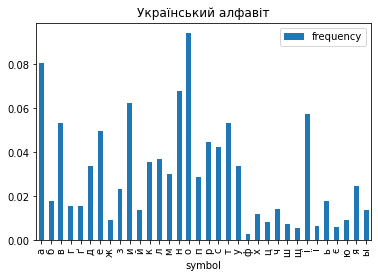

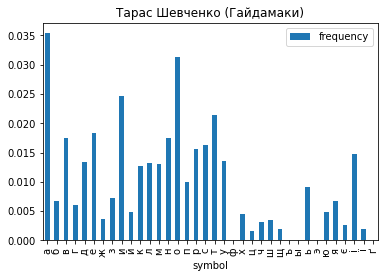

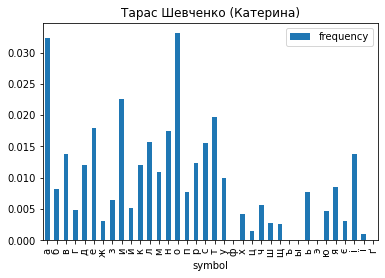

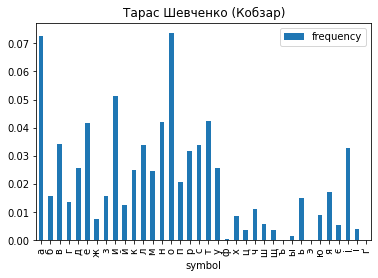

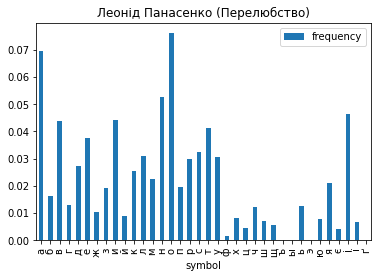

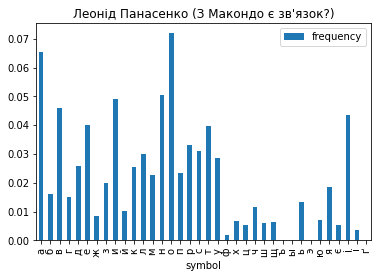

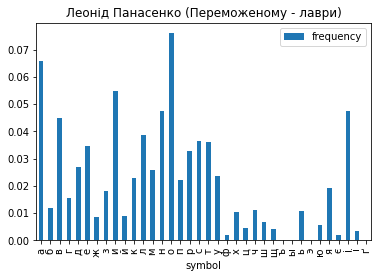

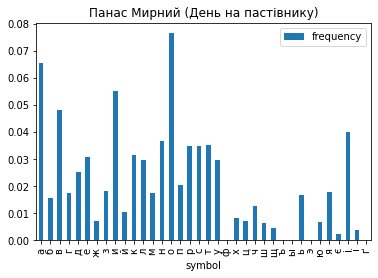

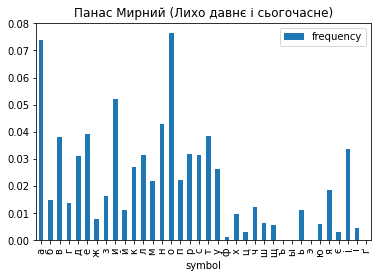

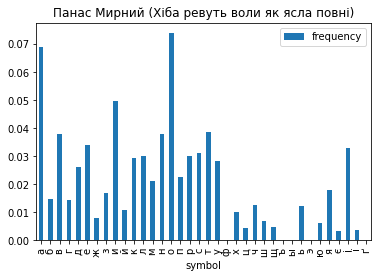

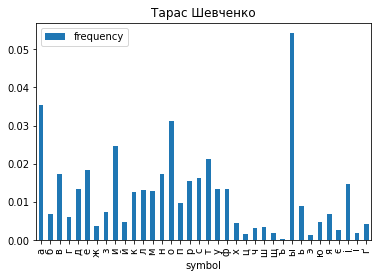

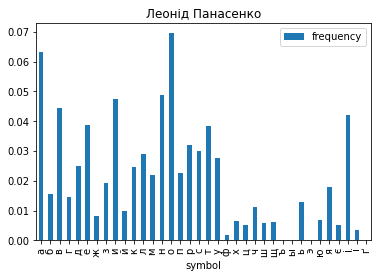

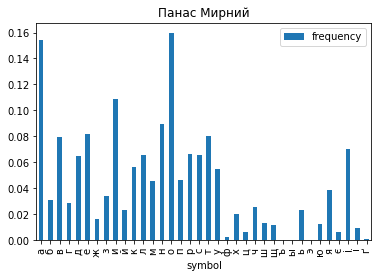

In [96]:
def freq_image_hist(freqs, title):
    hist_df = pd.DataFrame(freqs)
    hist_df.plot.bar(x='symbol',y='frequency', title=title)

# print(ukrainian_default_freqs)
freq_image_hist(ukrainian_default_freqs,"Український алфавіт")

for file in unigrams_freq:
    a = find_composition(file,)
    freq_image_hist(unigrams_freq[file], get_composition_title(a))

for author_name in unigrams_freq_per_author:
    freq_image_hist(unigrams_freq_per_author[author_name], author_name)

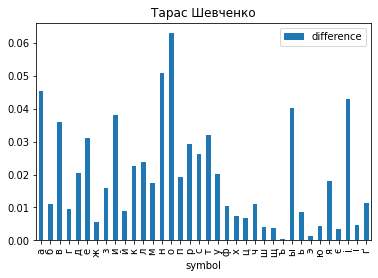

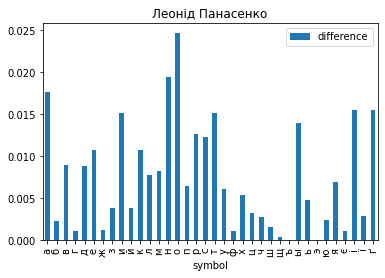

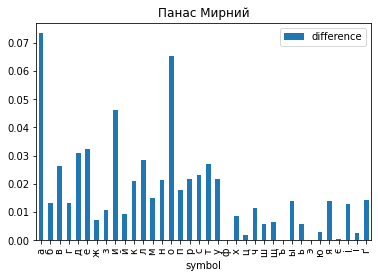

In [97]:
def find_diff_in_freqs(freqs):
    arr = []
    for freq in freqs:
        found_freq = next(filter(lambda x: x['symbol']==freq['symbol'],ukrainian_default_freqs),{'frequency': 0, 'symbol': freq['symbol']})
        arr.append({'symbol': freq['symbol'], 'difference': abs(freq['frequency']-found_freq['frequency'])})
    return arr

def diff_image_hist(freqs, title):
    hist_df = pd.DataFrame(freqs)
    hist_df.plot.bar(x='symbol',y='difference', title=title)

for author_name in unigrams_freq_per_author:
    freqs = find_diff_in_freqs(unigrams_freq_per_author[author_name])
    diff_image_hist(freqs, author_name)


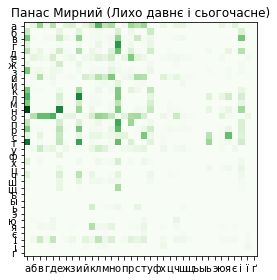

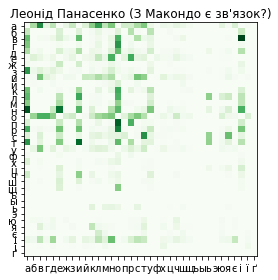

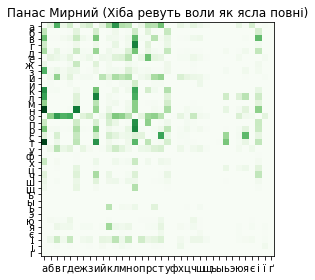

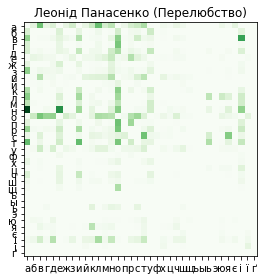

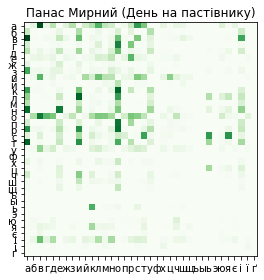

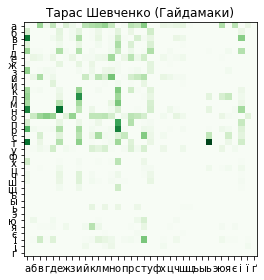

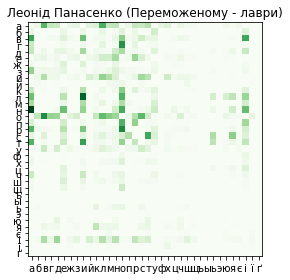

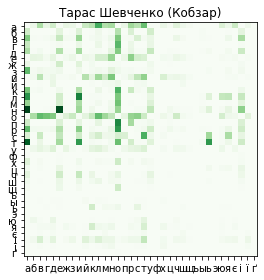

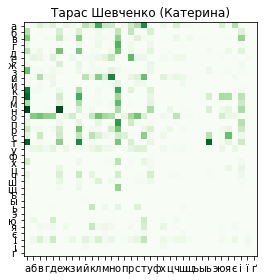

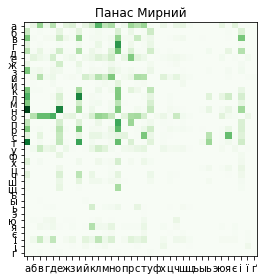

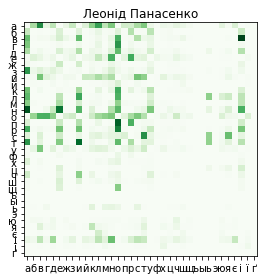

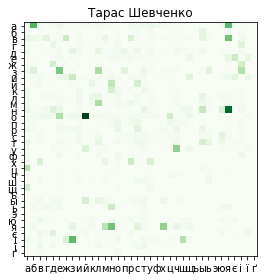

In [98]:
bigrams_freq={}
bigrams_freq_per_author_matrix={}

for file in total_bigrams:
    bigrams_freq[file]=[]
    i = 0
    for s in all_symbols_set:
        bigrams_freq[file].append([])
        for ss in all_symbols_set:
            bigram = s+ss
            l = next(filter(lambda x: x['name']==bigram, total_bigrams[file]), None)
            count = 0 if l is None else l['count']
            c = find_composition(file)
            bigrams_freq[file][i].append(round(count / c['total_letters'], 10))
        i+=1

for author_name in total_bigrams_per_author:
    bigrams_freq_per_author_matrix[author_name]=[]
    i = 0
    for s in all_symbols_set:
        bigrams_freq_per_author_matrix[author_name].append([])
        for ss in all_symbols_set:
            bigram = s+ss
            l = next(filter(lambda x: x['name']==bigram, total_bigrams_per_author[author_name]), None)
            count = 0 if l is None else l['count']
            author = find_author_total_by_name(author_name)
            bigrams_freq_per_author_matrix[author_name][i].append(round(count / author['total_letters'], 10))
        i+=1

import matplotlib.pyplot as plt
import numpy as np

def view_bigram_heatmap(freqs, title):
    fig, ax = plt.subplots()
    ax.imshow(freqs, cmap="Greens")

    ax.set_xticks(np.arange(len(all_symbols_set)))
    ax.set_yticks(np.arange(len(all_symbols_set)))
    ax.set_xticklabels(all_symbols_set)
    ax.set_yticklabels(all_symbols_set)


    ax.set_title(title)
    fig.tight_layout()
    plt.show()

for file in bigrams_freq:
    a = find_composition(file)
    view_bigram_heatmap(bigrams_freq[file], get_composition_title(a))

for author_name in bigrams_freq_per_author_matrix:
    a = find_composition_by_name(author_name)
    view_bigram_heatmap(bigrams_freq_per_author_matrix[author_name], author_name)

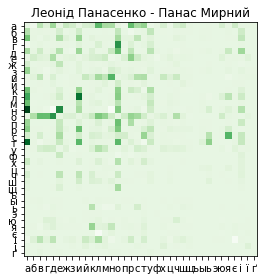

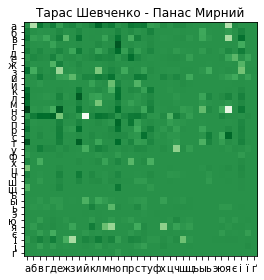

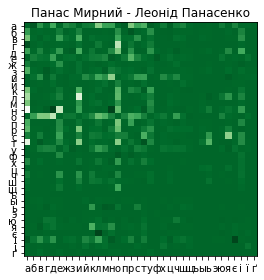

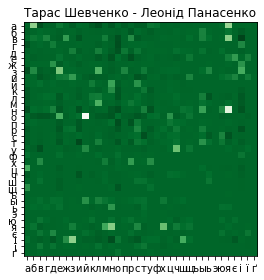

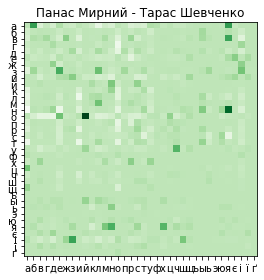

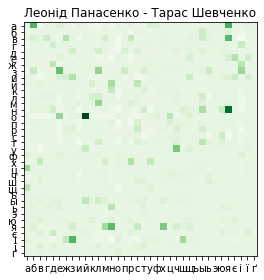

In [99]:
def find_diff_bigrams_in_freqs(a,b):
    return np.subtract(np.array(a),np.array(b))

for author_name_first in bigrams_freq_per_author_matrix:
    for author_name_second in bigrams_freq_per_author_matrix:
        a_first = find_author_total_by_name(author_name_first)
        a_second = find_author_total_by_name(author_name_second)
        if a_second['name'] == a_first['name']: continue
        diff_freqs = find_diff_bigrams_in_freqs(bigrams_freq_per_author_matrix[a_first['name']],bigrams_freq_per_author_matrix[a_second['name']])
        view_bigram_heatmap(diff_freqs, f"{a_second['name']} - {a_first['name']}")

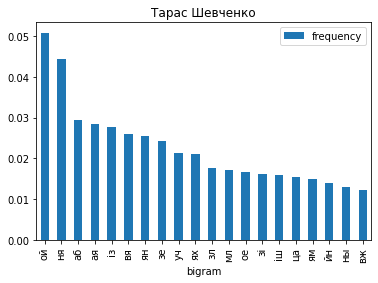

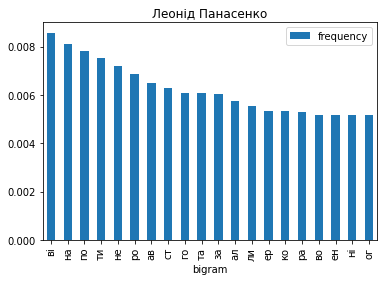

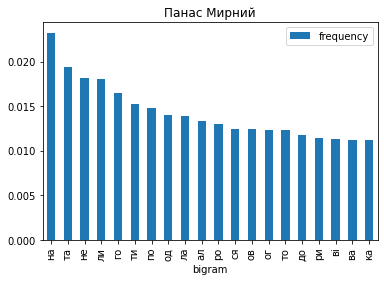

In [100]:
bigrams_freq_per_author={}

for a in authors:
    bigrams_freq_per_author[a['name']]=[]

for author_name in total_bigrams_per_author:
    bigrams_freq_per_author[author_name]=[]
    for s in all_symbols_set:
        for ss in all_symbols_set:
            bigram = s+ss
            l = next(filter(lambda x: x['name']==bigram, total_bigrams_per_author[author_name]), None)
            count = 0 if l is None else l['count']
            author = find_author_total_by_name(author_name)
            bigrams_freq_per_author[author['name']].append({'frequency': count / author['total_letters'],
                              'bigram': bigram})


for author_name in bigrams_freq_per_author:
    bigrams_freq_per_author[author_name]= (sorted(bigrams_freq_per_author[author_name],
                                                                key=lambda x: x['frequency'], reverse=True))[:20]


def view_bigram_histogram(freqs, title):
    hist_df = pd.DataFrame(freqs)
    hist_df.plot.bar(x='bigram',y='frequency', title=title)


for author_name in bigrams_freq_per_author:
    a = find_composition_by_name(author_name)
    view_bigram_histogram(bigrams_freq_per_author[author_name][:100], author_name)

In [101]:
def mean_freq(arr):
    sum=0
    for x in arr:
        sum+=x['frequency']
    return sum/len(arr)

print('unigrams_freq_per_author',unigrams_freq_per_author)
print('bigrams_freq_per_author',bigrams_freq_per_author)

mean_unigrams_freqs_per_author = {}
mean_bigrams_freqs_per_author = {}

for author_name in unigrams_freq_per_author:
    mean_unigrams_freqs_per_author[author_name]=mean_freq(unigrams_freq_per_author[author_name])
display(mean_unigrams_freqs_per_author)

for author_name in bigrams_freq_per_author:
    mean_bigrams_freqs_per_author[author_name]=mean_freq(bigrams_freq_per_author[author_name])

display(mean_bigrams_freqs_per_author)


unigrams_freq_per_author {'Тарас Шевченко': [{'frequency': 0.03538257408226449, 'symbol': 'а'}, {'frequency': 0.006781660032434026, 'symbol': 'б'}, {'frequency': 0.017396432257113372, 'symbol': 'в'}, {'frequency': 0.0060445230723868495, 'symbol': 'г'}, {'frequency': 0.013415892672858616, 'symbol': 'д'}, {'frequency': 0.0183547103051747, 'symbol': 'е'}, {'frequency': 0.003611971104231166, 'symbol': 'ж'}, {'frequency': 0.00729765590446705, 'symbol': 'з'}, {'frequency': 0.024620374465575703, 'symbol': 'и'}, {'frequency': 0.004791390240306649, 'symbol': 'й'}, {'frequency': 0.012752469408816159, 'symbol': 'к'}, {'frequency': 0.013194751584844464, 'symbol': 'л'}, {'frequency': 0.012973610496830311, 'symbol': 'м'}, {'frequency': 0.017396432257113372, 'symbol': 'н'}, {'frequency': 0.031254607106000296, 'symbol': 'о'}, {'frequency': 0.009877635264632168, 'symbol': 'п'}, {'frequency': 0.015553589856995429, 'symbol': 'р'}, {'frequency': 0.01621701312103789, 'symbol': 'с'}, {'frequency': 0.0213769

{'Тарас Шевченко': 0.011937523547430667,
 'Леонід Панасенко': 0.02098923654076562,
 'Панас Мирний': 0.04432804365435812}

{'Тарас Шевченко': 0.02263010467344833,
 'Леонід Панасенко': 0.006253314477638325,
 'Панас Мирний': 0.014292577969960937}

In [111]:

test_file_path='./samples/shevchenko_mezh_skalami.txt'
# test_file_path='./samples/mirniy_durnica.txt'
# test_file_path='./samples/mirniy_kazka-pro-pravdu-ta-kryvdu.txt'

test_files=['./samples/shevchenko_mezh_skalami.txt','./samples/mirniy_durnica.txt','./samples/mirniy_kazka-pro-pravdu-ta-kryvdu.txt']

def diffs_in_freq_means(authors_means,mean):
           # print(authors_means,mean)
           authors_diffs = authors_means.copy()
           for author_name in authors_diffs:
               authors_diffs[author_name] = abs(authors_diffs[author_name] - mean)
           return authors_diffs

def get_min_diff_in_freq_means(authors_diffs, chunk_size):
    min_mean = 1
    min_author = ""
    for author_name in authors_diffs:
        temp = min(min_mean,authors_diffs[author_name])
        if temp < min_mean:
            min_mean = temp
            min_author = author_name
    return {
        'chunk_size': chunk_size,
        # 'value': min_mean,
        'author': min_author
    }

default_chunks = [5000,10000,25000,50000]

def get_unigrams_freq(ngrams,total_letters):
    freq_arr = []
    for s in all_symbols_set:
        freqs = calc_freq(s,ngrams,total_letters)
        freq_arr.append(freqs)

    freq_arr=sorted(freq_arr, key=lambda x: x['symbol'])
    return freq_arr

def get_bigrams_freq(ngrams,total_letters):
    freq_arr = []
    for s in all_symbols_set:
        for ss in all_symbols_set:
            bigram = s+ss
            freqs = calc_freq(bigram,ngrams,total_letters)
            freq_arr.append(freqs)

    freq_arr=sorted(freq_arr, key=lambda x: x['symbol'])
    return freq_arr

def choose_best_author(test_file_path, n):
    test_file = open(test_file_path, 'r')
    test_file_name=os.path.basename(test_file.name)
    print(f'Checking: {test_file_name}')

    test_file_total_letters = get_total_letters(test_file)
    # print(test_file_total_letters)
    # chunks = default_chunks.copy()+[test_file_total_letters]
    chunks = default_chunks

    test_file = open(test_file_path, 'r')
    text = test_file.read()

    chunk_texts = list(map(lambda x: text[0:x],chunks))
    # print(len(chunk_texts))
    data=[]

    i=0
    for text in chunk_texts:

        test_file_ngrams = count_ngrams(text,n)

        # print(chunks[i],test_file_ngrams)

        get_ngrams_freq = get_unigrams_freq if n==1 else get_bigrams_freq

        test_file_ngrams_freq=get_ngrams_freq(test_file_ngrams,test_file_total_letters)

        # print(test_file_ngrams_freq)

        test_file_mean_freq = mean_freq(test_file_ngrams_freq)
        # print(test_file_mean_freq)

        mins = diffs_in_freq_means(mean_unigrams_freqs_per_author, test_file_mean_freq)
        best_author = get_min_diff_in_freq_means(mins, chunks[i])
        data+= [ [chunks[i]]+list(mins.values())+[best_author['author']] ]
        # data[i][0]=chunks[i]
        # data[i][1]=chunks[i]
        # display(data)

        i+=1

    return data



test_unigrams_data = choose_best_author(test_file_path,1)
test_bigrams_data = choose_best_author(test_file_path,2)
display(test_unigrams_data)

Checking: shevchenko_mezh_skalami.txt
Checking: shevchenko_mezh_skalami.txt


[[5000,
  0.006720706330391326,
  0.01577241932372628,
  0.03911122643731878,
  'Тарас Шевченко'],
 [10000,
  0.0029014161383779016,
  0.011953129131712856,
  0.035291936245305355,
  'Тарас Шевченко'],
 [25000,
  0.0029014161383779016,
  0.011953129131712856,
  0.035291936245305355,
  'Тарас Шевченко'],
 [50000,
  0.0029014161383779016,
  0.011953129131712856,
  0.035291936245305355,
  'Тарас Шевченко']]

In [112]:
def visualize_choice(data):
    df = pd.DataFrame(data)
    df.columns=['Розмір уривку тексту'] + list(mean_unigrams_freqs_per_author)+ ['Автор']
    return HTML(df.to_html(classes='table table-striped', index=None))

In [113]:
visualize_choice(test_unigrams_data)

Розмір уривку тексту,Тарас Шевченко,Леонід Панасенко,Панас Мирний,Автор
5000,0.006721,0.015772,0.039111,Тарас Шевченко
10000,0.002901,0.011953,0.035292,Тарас Шевченко
25000,0.002901,0.011953,0.035292,Тарас Шевченко
50000,0.002901,0.011953,0.035292,Тарас Шевченко


In [114]:
visualize_choice(test_bigrams_data)

# for test_file_path in test_files:
#     test_data = choose_best_author(test_file_path)
#     visualize_choice(test_data)



Розмір уривку тексту,Тарас Шевченко,Леонід Панасенко,Панас Мирний,Автор
5000,0.011827,0.020879,0.044217,Тарас Шевченко
10000,0.011744,0.020796,0.044135,Тарас Шевченко
25000,0.011744,0.020796,0.044135,Тарас Шевченко
50000,0.011744,0.020796,0.044135,Тарас Шевченко
